In [1]:
from src import transformer as tr
import pandas as pd
%matplotlib inline

In [2]:
filename = "D:/energo_data/01_zilina_suma.csv"
data = pd.DataFrame.from_csv(filename, index_col=[0,1])

In [3]:
len(data)

57220

In [4]:
data.columns

Index([u'SUM_of_MNOZSTVO'], dtype='object')

In [5]:
type(data.SUM_of_MNOZSTVO)

pandas.core.series.Series

In [6]:
data.SUM_of_MNOZSTVO.head

<bound method Series.head of DATUM       CAS  
2013-01-07  -105     21674.275309
            -90      21819.158939
            -75      21577.701649
            -60      21538.008315
            -45      21021.863567
            -30      21149.961595
            -15      20928.297538
             0       20818.104780
             15      20398.121972
             30      20420.926677
             45      20526.822862
             60      20448.730825
             75      20563.504802
             90      21781.495488
             105     22509.499896
             120     22385.644958
             135     22242.424154
             150     22416.578927
             165     22349.696562
             180     23232.155161
             195     25599.723094
             210     25537.201775
             225     26068.013061
             240     29997.216169
             255     36530.554026
             270     39973.808228
             285     42279.654548
             300     43609.590914
 

Celkova dlzka casoveho radu

In [7]:
len(data)

57220

Ako data vyzeraju?

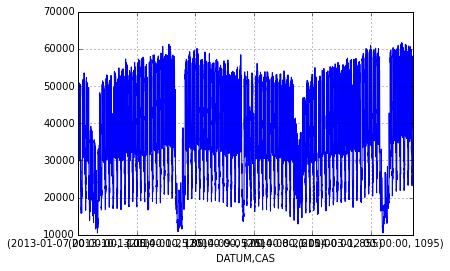

In [8]:
data.SUM_of_MNOZSTVO.plot()

Data za 1 tyzden

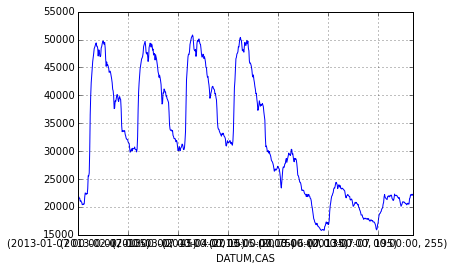

In [9]:
data.SUM_of_MNOZSTVO[:(96*7)].plot()

Transformacia. Velkost okna = 1 den, posunutie 1/2 dna, velkost zhluku 2

In [10]:
trans = tr.Transformer(96, 48, 2.0)
symbols = trans.transform(data.SUM_of_MNOZSTVO)

Velkost transformovaneho casoveho radu

In [11]:
len(symbols)

1191

Pocet symbolov v abecede

In [12]:
trans.distance_matrix.size()

211

### Hladanie prichadzajuceho symbolu v abecede.
Zakladny problem, ktory riesim je co najskor identifikovat, ktory symbol sa mi prave vytvara v datach. Teda ciastkovy casovy rad, ktory mi prichadza co najskor najst v abecede existujucich symbolov. 

Kedze abeceda symbolov je normalizovana, tak aj tento ciastkovy rad potrebujem normalizovat. Ale ako, ked ho este nemam cely?

Mohol by som sa pozriet na to, ako boli normalizovane predchadzajuce symboly. Kedze je reprezentacia rozdelena na 3 zlozky (symboly, posunutie normalizacie a nasobenie normalizacie), tak by sa tam mal niekde ukazat trend a sezonnost. To by som mohol pouzit.


Prehodenie symbolov do DataFrame struktury aby som sa s tym vedel hrat

In [13]:
symbol_data = [{"id": symbol.id, "scale_shift": symbol.scale_shift, "scale_multiple": symbol.scale_multiple} for symbol in symbols]
symbol_frame = pd.DataFrame(symbol_data)

In [14]:
symbol_frame.columns

Index([u'id', u'scale_multiple', u'scale_shift'], dtype='object')

In [15]:
len(symbol_frame)

1191

Posunutie normalizacie by malo fungovat ako nieco ako trend.

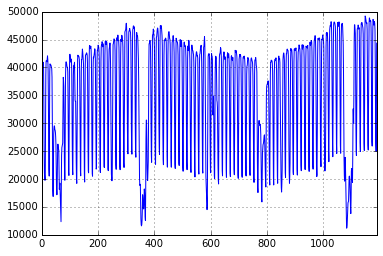

In [16]:
symbol_frame.scale_shift.plot()

Skusme si vytiahnut len nejaku mensiu cast. Napriklad 2 mesiace dat.

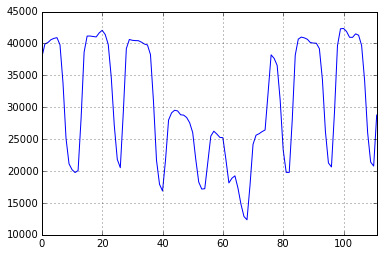

In [17]:
symbol_frame.scale_shift[:(14*4*2)].plot()

Podobne by mal fungovat aj nasobok z normalizacie

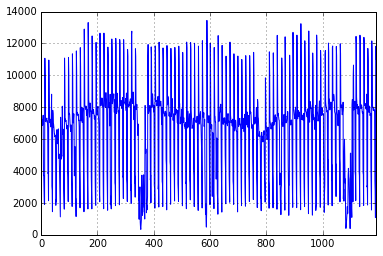

In [18]:
symbol_frame.scale_multiple.plot()

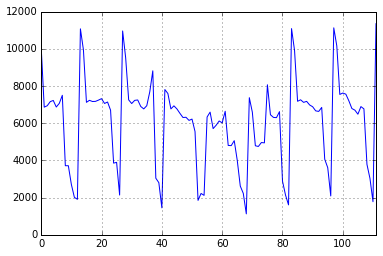

In [19]:
symbol_frame.scale_multiple[:(14*4*2)].plot()

Jasne tu je vidiet sezonnost na vyssej urovni (1 tyzden). Uplne sa pyta na tieto data znova pouzit transformaciu na to aby som vedel predikovat normalizaciu tych mojich symbolov pri predikcii.

To by som uz ale potreboval strasne vela dat na to aby som ten model natrenoval a aby som vedel z toho nieco robit. Ved uz len na tomto obrazku vyssie by som mal aspon 4 rozne opakujuce sa symboly.

Skor by to chcelo urcovat koeficienty na zaklade dat.

Na toto by som potreboval tabulu, pretoze sa mi nechcelo ribt obrazky :)